# Filtreleme Yöntemi (Filter Method) - Pearson Korelasyonu

Bu notebook, **Pearson Korelasyonu** kullanarak özellik seçimi yapar.

## Yöntem Açıklaması
- Her özellik ile hedef değişken (`is_popular`) arasındaki Pearson korelasyonu hesaplanır
- Korelasyon katsayısının mutlak değeri özellik önem skoru olarak kullanılır
- En yüksek korelasyona sahip 15 özellik seçilir

In [2]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Helper modüllerini import et
from dataset_helper import (
    load_processed_dataset,
    split_features_target,
    save_selected_dataset,
    get_feature_ranking,
    get_top_features
)
from file_helper import write_report
from report_helper import generate_analysis_report

## 1. Veri Kümesini Yükle

In [3]:
# İşlenmiş veri kümesini yükle
df = load_processed_dataset()

# Özellik ve hedef değişken olarak ayır
X, y = split_features_target(df, target_column='is_popular')

print(f"\nÖzellik isimleri:")
print(X.columns.tolist())

Veri kümesi yüklendi: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\feature_selection\..\dataset_files\processed_dataset.csv
Boyut: (39644, 59)
Özellik sayısı: 58
Örnek sayısı: 39644
Sınıf dağılımı: 0 -> 18490, 1 -> 21154

Özellik isimleri:
['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'week

## 2. Pearson Korelasyonu Hesapla

In [4]:
# Her özellik için hedef değişken ile Pearson korelasyonu hesapla
correlations = []
feature_names = X.columns.tolist()

for feature in feature_names:
    # Pearson korelasyonu hesapla
    corr, p_value = stats.pearsonr(X[feature], y)
    correlations.append(corr)

correlations = np.array(correlations)

print(f"Toplam özellik sayısı: {len(correlations)}")
print(f"\nKorelasyon aralığı: [{correlations.min():.4f}, {correlations.max():.4f}]")

Toplam özellik sayısı: 58

Korelasyon aralığı: [-0.1599, 0.1578]


## 3. Özellikleri Sırala

In [5]:
# Özellik sıralamasını oluştur
ranking_df = get_feature_ranking(feature_names, correlations, top_n=15)

# Tüm özelliklerin sıralamasını göster
print("\n=== TÜM ÖZELLİKLERİN KORELASYON SIRALAMASI ===")
print(ranking_df.to_string(index=False))


=== TÜM ÖZELLİKLERİN KORELASYON SIRALAMASI ===
 Sıra                       Özellik  Ham Skor  Mutlak Skor  Normalize Skor
    1                        LDA_02 -0.159896     0.159896        1.000000
    2                    kw_avg_avg  0.157787     0.157787        0.986787
    3         data_channel_is_world -0.154195     0.154195        0.964278
    4                    is_weekend  0.140852     0.140852        0.880673
    5 data_channel_is_entertainment -0.114156     0.114156        0.713401
    6        data_channel_is_socmed  0.112044     0.112044        0.700173
    7           weekday_is_saturday  0.108938     0.108938        0.680711
    8          data_channel_is_tech  0.102832     0.102832        0.642447
    9                        LDA_04  0.094877     0.094877        0.592604
   10                    kw_min_avg  0.090708     0.090708        0.566483
   11                     num_hrefs  0.090229     0.090229        0.563481
   12             weekday_is_sunday  0.083874     0.

## 4. En İyi 15 Özelliği Seç

In [6]:
# En iyi 15 özelliği seç
TOP_N = 15
selected_features = get_top_features(ranking_df, TOP_N)

print(f"\n=== SEÇİLEN EN İYİ {TOP_N} ÖZELLİK ===")
for i, feature in enumerate(selected_features, 1):
    score = ranking_df[ranking_df['Özellik'] == feature]['Normalize Skor'].values[0]
    raw_score = ranking_df[ranking_df['Özellik'] == feature]['Ham Skor'].values[0]
    print(f"{i:2d}. {feature:35s} - Korelasyon: {raw_score:7.4f}, Normalize: {score:.4f}")


=== SEÇİLEN EN İYİ 15 ÖZELLİK ===
 1. LDA_02                              - Korelasyon: -0.1599, Normalize: 1.0000
 2. kw_avg_avg                          - Korelasyon:  0.1578, Normalize: 0.9868
 3. data_channel_is_world               - Korelasyon: -0.1542, Normalize: 0.9643
 4. is_weekend                          - Korelasyon:  0.1409, Normalize: 0.8807
 5. data_channel_is_entertainment       - Korelasyon: -0.1142, Normalize: 0.7134
 6. data_channel_is_socmed              - Korelasyon:  0.1120, Normalize: 0.7002
 7. weekday_is_saturday                 - Korelasyon:  0.1089, Normalize: 0.6807
 8. data_channel_is_tech                - Korelasyon:  0.1028, Normalize: 0.6424
 9. LDA_04                              - Korelasyon:  0.0949, Normalize: 0.5926
10. kw_min_avg                          - Korelasyon:  0.0907, Normalize: 0.5665
11. num_hrefs                           - Korelasyon:  0.0902, Normalize: 0.5635
12. weekday_is_sunday                   - Korelasyon:  0.0839, Normalize: 

## 5. Korelasyon Matrisi Görselleştirmesi (Opsiyonel)

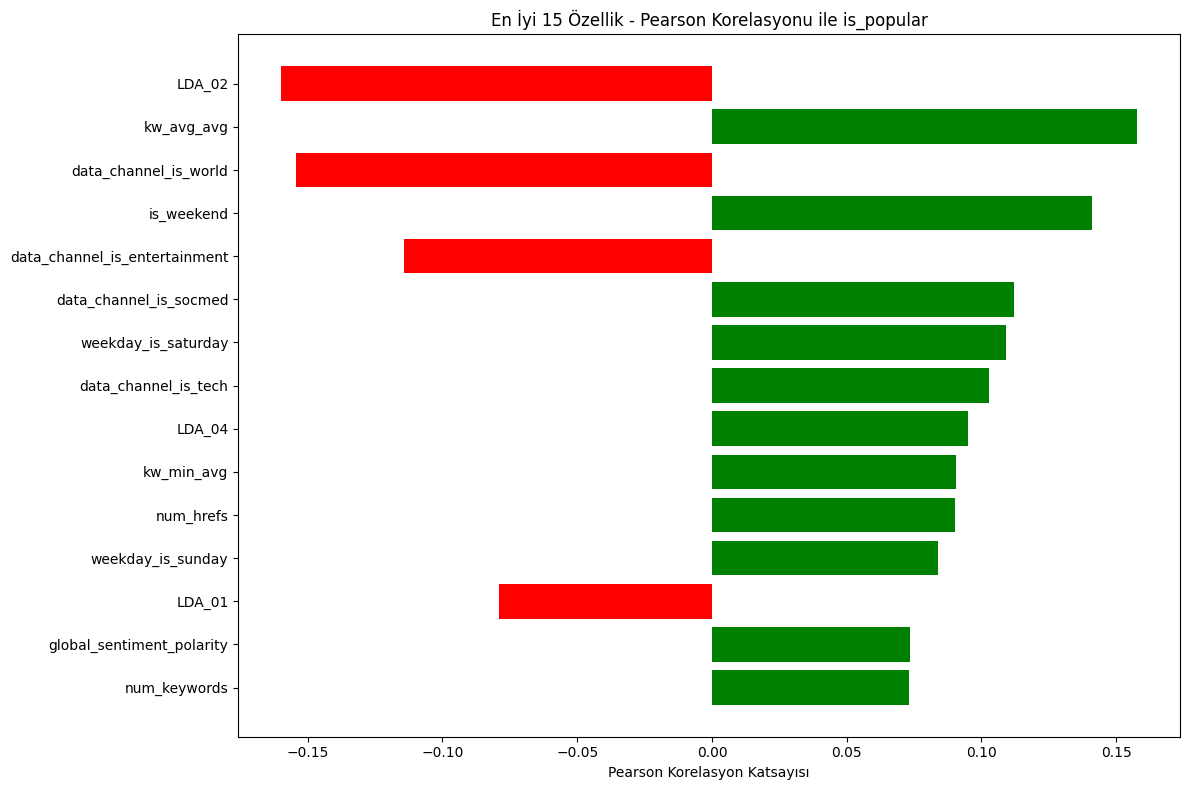

Grafik kaydedildi: filter_method_correlations.png


In [ ]:
import matplotlib.pyplot as plt

# Seçilen özellikler için bar plot
top_15_df = ranking_df.head(TOP_N).copy()

plt.figure(figsize=(12, 8))
colors = ['green' if x >= 0 else 'red' for x in top_15_df['Ham Skor']]
plt.barh(range(len(top_15_df)), top_15_df['Ham Skor'], color=colors)
plt.yticks(range(len(top_15_df)), top_15_df['Özellik'])
plt.xlabel('Pearson Korelasyon Katsayısı')
plt.title('En İyi 15 Özellik - Pearson Korelasyonu ile is_popular')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('photos/filter_method_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

print("Grafik kaydedildi: filter_method_correlations.png")

## 6. Analiz Raporu Oluştur

In [8]:
# Rapor için yöntem açıklaması
method_description = """
Filtreleme yöntemi olarak **Pearson Korelasyonu** kullanılmıştır. Bu yöntem, her bir özellik ile 
hedef değişken (`is_popular`) arasındaki doğrusal ilişkiyi ölçer.

### Yöntem Detayları:
- Pearson korelasyon katsayısı -1 ile +1 arasında değer alır
- +1: Mükemmel pozitif korelasyon
- -1: Mükemmel negatif korelasyon  
- 0: Korelasyon yok

### Avantajları:
- Hesaplama açısından verimli
- Model bağımsız (filter method)
- Yorumlaması kolay

### Dezavantajları:
- Sadece doğrusal ilişkileri yakalar
- Özellikler arası etkileşimleri dikkate almaz
"""

# Dataset bilgisi
dataset_info = {
    "name": "processed_dataset.csv",
    "shape": f"{df.shape}",
    "source": "UCI Online News Popularity"
}

# Ek notlar
additional_notes = """
Bu analiz sonucunda, haberin popülerliği ile en yüksek korelasyona sahip özellikler genellikle:
- Anahtar kelime (keyword) ile ilgili metrikler
- Referans paylaşım sayıları
- LDA konu modeli özellikleri

gibi kategorilerden gelmektedir.
"""

# Rapor oluştur
report_content = generate_analysis_report(
    method_name="Filtreleme Yöntemi - Pearson Korelasyonu",
    method_description=method_description,
    ranking_df=ranking_df,
    top_n=TOP_N,
    dataset_info=dataset_info,
    additional_notes=additional_notes
)

# Rapor kaydet
write_report(report_content, "filter_analysis_report.md")

print("\nRapor başarıyla oluşturuldu!")

Rapor kaydedildi: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\feature_selection\filter_analysis_report.md

Rapor başarıyla oluşturuldu!


## 7. Seçilen Özelliklerle Veri Kümesi Oluştur

In [9]:
# Seçilen özelliklerle yeni veri kümesi oluştur ve kaydet
output_file = "filter_method_selected_dataset.csv"

save_selected_dataset(
    df=df,
    selected_features=selected_features,
    target_column='is_popular',
    filename=output_file
)

print(f"\n✅ Filtreleme yöntemi tamamlandı!")
print(f"   - {TOP_N} özellik seçildi")
print(f"   - Veri kümesi: {output_file}")
print(f"   - Rapor: filter_analysis_report.md")


Seçilen özelliklerle veri kümesi kaydedildi: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\feature_selection\..\dataset_files\filter_method_selected_dataset.csv
Boyut: (39644, 16)
Sütunlar: ['LDA_02', 'kw_avg_avg', 'data_channel_is_world', 'is_weekend', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'weekday_is_saturday', 'data_channel_is_tech', 'LDA_04', 'kw_min_avg', 'num_hrefs', 'weekday_is_sunday', 'LDA_01', 'global_sentiment_polarity', 'num_keywords', 'is_popular']

✅ Filtreleme yöntemi tamamlandı!
   - 15 özellik seçildi
   - Veri kümesi: filter_method_selected_dataset.csv
   - Rapor: filter_analysis_report.md


## 8. Özet

In [10]:
print("="*60)
print("FİLTRELEME YÖNTEMİ - ÖZET")
print("="*60)
print(f"Kullanılan Yöntem: Pearson Korelasyonu")
print(f"Toplam Özellik Sayısı: {len(feature_names)}")
print(f"Seçilen Özellik Sayısı: {TOP_N}")
print(f"\nSeçilen Özellikler:")
for i, feat in enumerate(selected_features, 1):
    print(f"  {i}. {feat}")
print("="*60)

FİLTRELEME YÖNTEMİ - ÖZET
Kullanılan Yöntem: Pearson Korelasyonu
Toplam Özellik Sayısı: 58
Seçilen Özellik Sayısı: 15

Seçilen Özellikler:
  1. LDA_02
  2. kw_avg_avg
  3. data_channel_is_world
  4. is_weekend
  5. data_channel_is_entertainment
  6. data_channel_is_socmed
  7. weekday_is_saturday
  8. data_channel_is_tech
  9. LDA_04
  10. kw_min_avg
  11. num_hrefs
  12. weekday_is_sunday
  13. LDA_01
  14. global_sentiment_polarity
  15. num_keywords
